In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/'
                 'breast-cancer-wisconsin/wdbc.data', header=None)

In [2]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

X,y = df.iloc[:, 2:].values, df.iloc[:,1].values
le = LabelEncoder()
# Encode the target values ( B, M will be converted to numbers)
y = le.fit_transform(y)
print("The target classes ", le.classes_,
      " from the dataset are encoded as", le.transform(le.classes_), ".")


The target classes  ['B' 'M']  from the dataset are encoded as [0 1] .


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.2, stratify=y, random_state=1)

In [21]:
# This is what stratify does
print(len(y_train==1),len(y_train==0))
print(len(y_test==1), len(y_test==0))

455 455
114 114


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=2),
            LogisticRegression(random_state=1, solver='lbfgs'))

- make_pipeline creates an array of _transformers_ and a final _estimator_ 
- all transformers perform a fit and transform on the data in the order they are listed and the final estimator will perform a fit

In [24]:
pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)

print("Accuracy: %.3f"% pipe_lr.score(X_test,y_test))

Accuracy: 0.956


## Accessing model performance 

### Holdout cross-validation
- separate the data into 3 parts: train, validation, test
- tranining dataset is used to fit different models
- performance on the validation dataset is then used for model selection
- performance estimate will depend on how we partition the data into training and validation subsets
### k-fold cross-validation
- randomly split the training datasets into k-folds without replacement
- k-1 folds are used for model training and the k$^{th}$ fold is used for performance evaluation
- procedure repeated k-times to obtain k models and performance estimates


In [35]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []

In [31]:
for k, (train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train],y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print("K-fold: %2d, Class dist: %s, Acc: %.3f"%(k+1,
                        np.bincount(y_train[train]),score))

K-fold:  1, Class dist: [256 153], Acc: 0.935
K-fold:  2, Class dist: [256 153], Acc: 0.935
K-fold:  3, Class dist: [256 153], Acc: 0.957
K-fold:  4, Class dist: [256 153], Acc: 0.957
K-fold:  5, Class dist: [256 153], Acc: 0.935
K-fold:  6, Class dist: [257 153], Acc: 0.956
K-fold:  7, Class dist: [257 153], Acc: 0.978
K-fold:  8, Class dist: [257 153], Acc: 0.933
K-fold:  9, Class dist: [257 153], Acc: 0.956
K-fold: 10, Class dist: [257 153], Acc: 0.956


In [32]:
print("Cross-validation accuracy: %.3f +/- %.3f"%(np.mean(scores), np.std(scores)))

Cross-validation accuracy: 0.950 +/- 0.014


In [36]:
# This can be implemented using sklearn easily

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train,
                        cv=10, n_jobs=2)
print("CV accuracy scores: %s" % scores)
print("Cross-validation accuracy: %.3f +/- %.3f"%(np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
Cross-validation accuracy: 0.950 +/- 0.014


## Debugging with learning and validation curves

- High bias
    - low training and cross-validation accuracy
    - model too simple 
    - increase no. of parameters
    - decresing the degree of regularization (C-parameter in SVM, LR)
    
- High Variance
    - high training accuracty but large gap between training and cross-validation accuracy
    - reduce the complexity of the model (cut down features)
    - increase the degree of regularization

Let us use learning curve function from sklearn for model evaluation

In [56]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression
                       (penalty='l2', random_state=10, 
                       solver='lbfgs', max_iter=10000))
train_sizes, train_scores, test_scores = learning_curve(
                estimator=pipe_lr, X=X_train, y=y_train, 
            train_sizes=np.linspace(0.1,1.0,10),
            cv=10, n_jobs=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print(train_mean)

[1.         1.         0.99344262 0.99754601 0.99166667 0.98571429
 0.98601399 0.98746177 0.9888587  0.98924205]


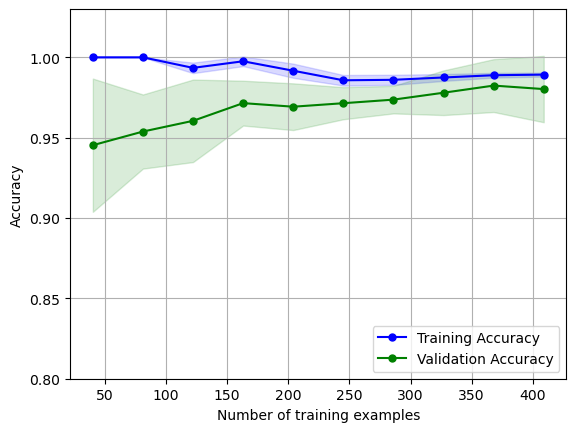

In [58]:
plt.plot(train_sizes, train_mean, color='b', marker='o',
        markersize=5.0, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean -train_std, alpha=0.15, color='b')

plt.plot(train_sizes, test_mean, color='g', marker='o',
        markersize=5.0, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, 
                 test_mean + test_std, alpha=0.15, color='g')

plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.ylim(0.8,1.03)
plt.legend(loc='lower right')
plt.grid()
plt.show()

Model performs quite well when the training set sizes is over 250. However, at lower number of training examples, the gap between the training and validation accuracy widens suggesting overfitting. 

## Adressing overfitting and underfitting with validation curves
- Validation curves are related to learning curves but instead of plotting accuracies as a function of training set size, the value of the model parameters is adjusted. For e.g. inverse regularization parameter, C, in Logistic Regression

In [63]:
from sklearn.model_selection import validation_curve

c_vals = [10**x for x in [-3,-2,-1,0,1,2]]

train_scores, test_scores = validation_curve(estimator=pipe_lr, 
                    X=X_train, y=y_train, 
                    param_name = 'logisticregression__C',
                    param_range = c_vals,
                    cv = 10)      

In [70]:
print(np.shape(train_scores))
print(np.shape(test_scores))

(6, 10)
(6, 10)


__The output of the validation_curve will be a matrix of scores__
- It will have nrows = length of c_val
- It will have ncols = number of folds in k-mean cross validation

- train_mean will have mean for each c_val value across all cv folds 

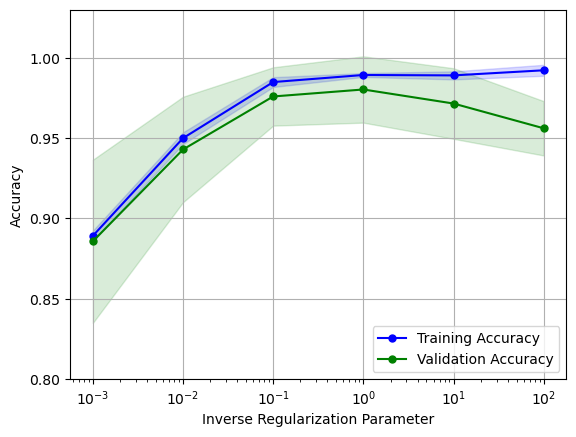

In [72]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(c_vals, train_mean, color='b', marker='o',
        markersize=5.0, label='Training Accuracy')
plt.fill_between(c_vals, train_mean + train_std, 
                 train_mean -train_std, alpha=0.15, color='b')

plt.plot(c_vals, test_mean, color='g', marker='o',
        markersize=5.0, label='Validation Accuracy')
plt.fill_between(c_vals, test_mean - test_std, 
                 test_mean + test_std, alpha=0.15, color='g')

plt.xlabel("Inverse Regularization Parameter")
plt.ylabel("Accuracy")
plt.ylim(0.8,1.03)
plt.xscale('log')
plt.legend(loc='lower right')
plt.grid()
plt.show()

- Underfits for small value of C (higher strength of regularization)
- for larger C, (lower strength of regularization), model slightly overfit the data
- best value of the C parameter is between 0.01 and 0.1

## Improving ML models via grid search
- Grid search is a hyperparameter optimization technique that can help improve the performance of a model by finding the optimal combination of hyperparameter values
- list of hyperparameter values are specified and the algorithm evaluates the model performance of each combination of hyperparameters

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

exp = [-4,-3,-2.-1,0,1,2,3]
c_vals = np.power(10,exp)

c_grid = [{'svc__C':c_vals,'svc__kernel':['linear']},
         {'svc__C':c_vals, 'svc__gamma':c_vals,'svc__kernel':['rbf']}]

In [77]:
print(c_grid)

[{'svc__C': array([1.e-04, 1.e-03, 1.e-03, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'svc__kernel': ['linear']}, {'svc__C': array([1.e-04, 1.e-03, 1.e-03, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'svc__gamma': array([1.e-04, 1.e-03, 1.e-03, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'svc__kernel': ['rbf']}]


In [78]:
gs=GridSearchCV(estimator=pipe_svc, param_grid=c_grid,
               scoring='accuracy', cv=10, refit=True, n_jobs=5)
gs = gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


__Best k-fold cross validation accuracy of 98.5% using a RBF 
kernel SVM model with svc__C = 100.0__

We can than use the best selected model using the best_estimator_ attribute of GridSearchCV object

In [79]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print("Test Accuracy: %.3f"%clf.score(X_test,y_test))

Test Accuracy: 0.974


__This is not necessary if the refit=True is set in the GridSearchCV class, becuase the refit parameter will refit the gs.best_estimator_ to the whole training set automatically__

### Nested cross-validation assisted algorithm selection
- outer k-fold cross-validation loop to split the data into training and test fold
- inner loop to select the model using k-fold cv on the training fold

Let us look at a $5\times2$ cross-validation (5 outer loops and 2 inner loops)

In [80]:
# Inner loop # Tunes the parameter
gs=GridSearchCV(estimator=pipe_svc, param_grid=c_grid,
               scoring='accuracy', cv=2)

In [83]:
# Outer loop # Train with optimal parameters from gs
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', 
                        cv=5)
print("CV accuracy: %.3f +/- %.3f" %(np.mean(scores), np.std(scores)))

CV accuracy: 0.978 +/- 0.017


In [84]:
scores

array([0.98901099, 0.98901099, 0.94505495, 0.97802198, 0.98901099])

### Nested CV to compare SVM and decision tree


In [86]:
from sklearn.tree import DecisionTreeClassifier

gs=GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                param_grid=[{'max_depth':[1,2,3,4,5,6,7,None]}],
               scoring='accuracy', cv=2)

In [87]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', 
                        cv=5)

In [88]:
print("CV accuracy: %.3f +/- %.3f" %(np.mean(scores), np.std(scores)))

CV accuracy: 0.934 +/- 0.016


__SVM does better than decision tree__

## Model Performance Evaluation Metrics

### Confusion Matrix
- Square matrix reporting counts of TP, TN, FP, FN predictions of a classifier

In [89]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(conf_mat)

[[71  1]
 [ 2 40]]


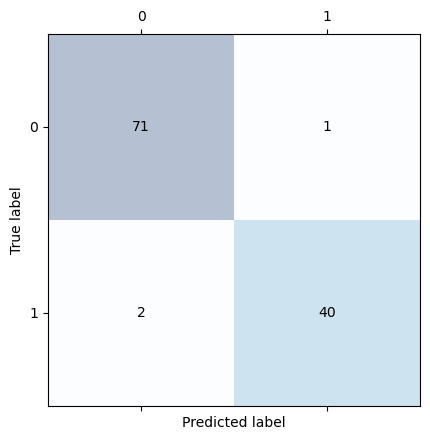

In [90]:
plt.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(x=j, y =i, s=conf_mat[i,j], va='center', ha='center')
        
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

- 0: beingn, 1:malignant
- correctly classifies 71 benign tumours
- correclty classifies 40 malignant tumours
- falsely classifies 2 malignant tumours as benign
- falsely classifies 1 benign tumour as malignant

### Optimizing precision and recall in a classification model

$ERR = \frac{FP+FN}{FP+FN+TP+TN}$

$ACC = 1 - ERR = \frac{TP+TN}{FP+FN+TP+TN}$

$PRE =  \frac{TP}{TP+FP}$

$REC =  \frac{TP}{FN+TP}$

$F1 = 2\frac{PRE \times REC}{PRE + REC}$


In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision: %.3f"% precision_score(y_true=y_test,
                                        y_pred=y_pred))

print("Recall: %.3f"% recall_score(y_true=y_test,
                                        y_pred=y_pred))

print("F1: %.3f"% f1_score(y_true=y_test,
                                        y_pred=y_pred))


Precision: 0.976
Recall: 0.952
F1: 0.964
